In [4]:
import numpy as np
import pandas as pd
from sklearn import model_selection
from sklearn import metrics
from sklearn import preprocessing
from sklearn import feature_extraction
from sklearn import linear_model
from sklearn import multiclass
from sklearn import svm
from sklearn import neighbors
from sklearn import naive_bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score ,confusion_matrix
import matplotlib.pyplot as plt




In [7]:
news = pd.read_csv('vesti.csv')
news.info()
news.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165699 entries, 0 to 165698
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  165699 non-null  int64 
 1   tekst       165698 non-null  object
 2   kategorija  165699 non-null  object
dtypes: int64(1), object(2)
memory usage: 3.8+ MB


,Unnamed: 0,tekst,kategorija
0,36290,shall overcomb say 100000 march trump londonth...,WOMEN
1,21194,bone didnt teach glamour taught respectoftenti...,HEALTHY LIVING
2,29672,im sorrythe two tragically forgotten word cust...,BUSINESS
3,199048,divorce ruin life child blame youit sunday nig...,DIVORCE
4,193783,well sit civilian flea theaterthe civilian ent...,DIVORCE


In [8]:
continents = ['POLITICS' , 'ENTERTAINMENT']
news = news[news.kategorija.isin(continents)]



In [9]:

news.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 44187 entries, 10 to 165698
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  44187 non-null  int64 
 1   tekst       44187 non-null  object
 2   kategorija  44187 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.3+ MB


In [10]:
X = news['tekst']
y = news['kategorija']


In [11]:
tfidf_vectorizer = feature_extraction.text.TfidfVectorizer()
tfidf_vectorizer.fit(X.values.astype('U'))

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [12]:
X_transformed = tfidf_vectorizer.transform(X.values.astype('U'))
y_transformed = y.astype('category')
classes = dict(enumerate(y_transformed.cat.categories))
y_transformed = y_transformed.cat.codes


In [13]:
X_train, X_test, y_train, y_test = model_selection.\
    train_test_split(X_transformed, y_transformed, test_size = 0.33, stratify = y_transformed, random_state = 4)

In [19]:
model = linear_model.LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)
y_test_predicted = model.predict(X_test)

In [20]:
acc=metrics.accuracy_score(y_test, y_test_predicted)
f1=metrics.f1_score(y_test, y_test_predicted)
matrix=metrics.confusion_matrix(y_test, y_test_predicted)

print('Najbolji rezultat na test skupu je: ',acc)
print('Matrica konfuzije:\n ', matrix)
print('F1 ', f1)


Najbolji rezultat na test skupu je:  0.9655054176381841
Matrica konfuzije:
  [[4523  413]
 [  90 9556]]
F1  0.9743563599286261


In [21]:
alphas=[0.005,0.006,0.007,0.01,0.02,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
best_acc=0
best_alpha=None
bayesArray=[]
for alpha in alphas:
    model = MultinomialNB(alpha=alpha)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    accuracy = accuracy_score(y_test,y_predict)
    bayesArray.append(accuracy)
    if accuracy> best_acc:
        best_acc = accuracy
        best_alpha = alpha
print('Najbolja preciznost na test skupu je: ', best_acc)
print('Najbolji alfa parametar modela su: ', best_alpha)

Najbolja preciznost na test skupu je:  0.9675627485941571
Najbolji alfa parametar modela su:  0.1


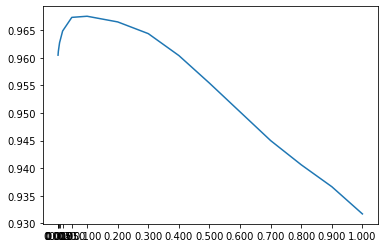

In [22]:
plt.plot(alphas,bayesArray)
plt.xticks(alphas)
plt.show()

In [23]:
n_neighbors_list=list(range(1, 21))
best_acc_test=0
best_acc_train=0
best_n=None
knnArray=[]
for n_neighbors in n_neighbors_list:
    knn_model = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors)
    knn_model.fit(X_train, y_train)
    y_predict = knn_model.predict(X_test)
    accuracy_test = accuracy_score(y_test,y_predict)
    knnArray.append(accuracy_test)
  #  accuracy_train = knn_model.score(X_train, y_train)
    if accuracy_test> best_acc_test:
        best_acc_test = accuracy_test
   #     best_acc_train=accuracy_train
        best_n = n_neighbors
print('Najbolji rezultat na test skupu je: ',best_acc_test)
print('Najbolji parametri modela su: ', best_n)

Najbolji rezultat na test skupu je:  0.9546015635715266
Najbolji parametri modela su:  16


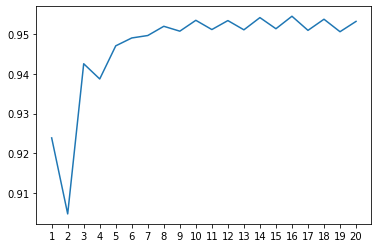

In [24]:
plt.plot(n_neighbors_list,knnArray)
plt.xticks(n_neighbors_list)
plt.show()
